<a href="https://colab.research.google.com/github/caspervanengelenburg/interactive_architecture_Q3_CV2/blob/main/interactive_architecture_Q3_CV2_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision session 2 - *detection*, *size estimation*, and *localization* of design elements

1:1 Interactive Architecture Prototypes (ARO122, Delft University of Technology, faculty of Architecture and the Built-Environment)

[Link github repository CV sessions](https://github.com/caspervanengelenburg/interactive_architecture_Q3_CV2)


## Set-up 

The organization of the assignment is as follows:

- [pre-requisites and instructions](#pre)
- [bigger picture and output](#bigger-picture)
- [mount drive, load and show image](#recap)
- [introduction to python course library](#library)
- [image processing and binary operations](#imgprocessing)
- [advanced classical computer vision: contour finding and warping](#advanced)
- [the link to detection, size estimation, and localization](#link)
- [your own pipeline](#assignment)

<a name="pre"></a>
## Pre-requisites
- completion of first Computer vision (CV) assignment: "Computer vision 1 - Interactive Architecture Prototypes"
- basic understanding of work-around in _Python_
- basic understanding of work-around in _Google Colaboratory_
- basic understanding of _OpenCV_ library and how to import, load, and plot images

## Instructions

To start working on the assignment in Colab, first **open in Colab** (`open in Colab` on the top of the file) and afterwards **save a copy on your Google Drive** (`File` $→$ `Save a copy in Drive`). 

If you have a saved copy, you are ready to start working on the assignment. Please go through the assignment in chronological order. 

<a name="bigger-picture"></a>
## The bigger picture and output

In the assignment, you will learn to create a hand-made pipeline that can detect, estimate, and localize the design elements at the 'pick' location. This is necessary information to inform the robotic arm where it should go to in the next iteration. With only the use of real-time camera's (no markers, no other sensors), advanced computer vision methods have proven to be able to do these type of tasks in arguably complex and difficult-to-understand environments. In this assignment, you will focus on relatively simple (classical) computer vision approaches and constrain the problem to be something that is doable in the limited amount of time you have. Besides, we think there is an educational benefit as well: you will understand, at the fundamental level, the methods we will discuss. Let's start! 

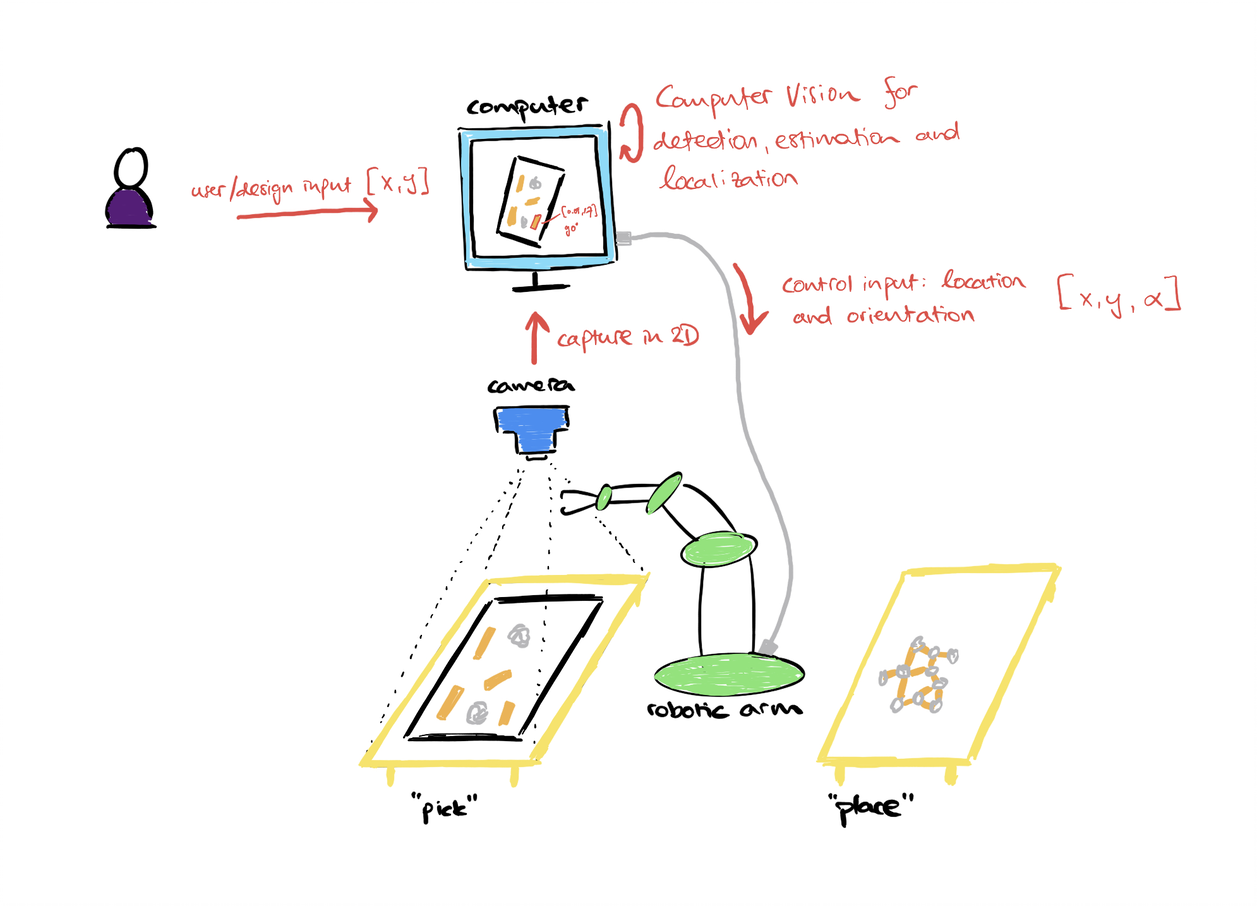


- camera position: top view makes sure the 'pick' domain can be effectively represented in 2D
- rectangular frame around the 'pick' domain. The robot knows the exact dimensions and coordinates of the (black) rectangular frame.

<a name="library"></a>
## Image manipulation library

We developed a specific for-the-course function library you will make use of. The [python library](https://github.com/caspervanengelenburg/interactive_architecture_Q3_CV2/blob/main/ia-cv-library.py) consists of functions that are relevant for the task at hand. You are encouraged to have a look at the [documentation](https://github.com/caspervanengelenburg/interactive_architecture_Q3_CV2/blob/main/ia-cv-library.md) which gives an overview of the functions and the naming of the functions. The documentation consists of 3 categories:

- `utilities` 'general' functions
- `image manipulation` core of the library, contains all the methods 'working' on the image, such as rgb to grayscale transformations, blurring, binary morphological operations, and more advanced ones such as contour finding and image warping
- `image plotting` contains tools that are, for example, able to plot the image and/or plot the bounding boxes of (a collection of) contour(s) on top of that image.

The library is imported as follows.

In [2]:
!pip install requests
import requests

def url2libary(url):
    
    #get url
    r = requests.get(url)

    # make sure your filename is the same as how you want to import 
    with open('iacvlibrary.py', 'w') as f:
        f.write(r.text)

# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/caspervanengelenburg/interactive_architecture_Q3_CV2/main/iacvlibrary.py?token=GHSAT0AAAAAABRM23EN7ZZEITXDHZBVJW5GYQ7PZSA'

# use url2libary to import the library
url2libary(url)

# now we can import (* import all!)
from iacvlibrary import *

<a name="recap"></a>
## Drive mount and load image
You will first mount the drive and load the *new* image in the code cell below. You should be familiar with the code since it similar to the last assignment. 

Mounted at /content/gdrive


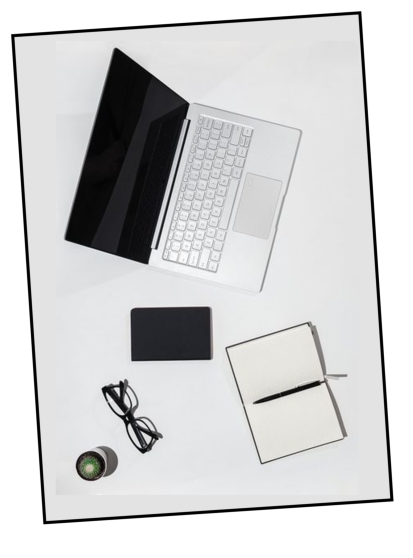

In [3]:
#You need to give access to your google drive to mount the virtual drive here
import cv2
import os
from google.colab import drive
drive.mount('/content/gdrive')

#read image using cv2.imread (note: these might differ from your folder structure and filename)
img =  cv2.imread(r"/content/gdrive/My Drive/PhD/Interactive architecture/mintable-boundingbox.png")


#shows the image
imshow(img)

<a name="imgprocessing"></a>
## Image processing and binary operations

In this section, you will get familiarized with some fundamental computer vision methods. You should know that at the core of many computer vision applications, these functions are used very often or, at least, are huge sources of inspiration. In the previous CV session you were confronted already with two very basal, but important, examples: detection of edges and color to grayscale transformation. For the latter, you already know explicitly the difference between input and output, and moreover how to map from input to output. For the former, namely edge detection you probably do not.

All the methods that will be provided in this section are based on, what computer scientist call, **filters**. The output of *applying* a filter (e.g. a blurring filter) results in a *filtered image* (e.g. a blurred image). At the conceptual level, a filter *looks* at each pixel and replaces it by another value (or array if you like), for which the *new value depends only on the neighbourhood* pixels. For every pixel, we use the exact same filter, making it possible to apply them to images relatively fast. In the lecture we have discussed how filters work exactly and how some clever designed filters can help us manipulate images in useful ways. On a side note, rather an important one, it is a collection of learnable filters that are the working horses in state-of-the-art neural networks, namely convolutional neural networks. 

The following functions can be used to extract in a similar way some basal information from the image, resizes the image, and plots/shows it:

- `getshape` prints/gets the shape of imagej
- `imresize` resizes the image
- `imshow` plots an image inline

In [4]:
#shape of the image
getshape(img)

Shape of the image is 3093 x 2272 x 3 (height x width x dimension)


That is a rather large image, let's resize it.

Shape of the image is 680 x 500 x 3 (height x width x dimension)


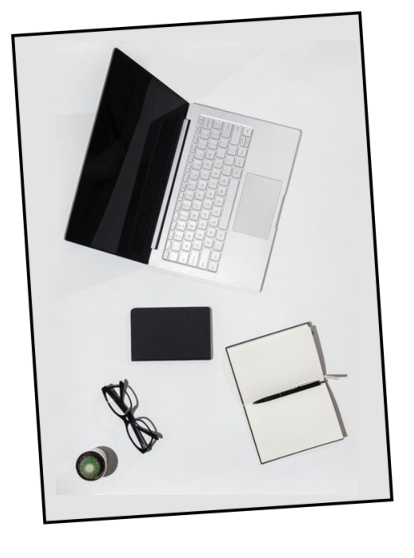

In [5]:
#reshape the image
img = imresize(img, w_resize=500)
getshape(img)

imshow(img)

The following filter finds the edges using a Canny filter (a basic thresholding filter). A zoom is applied to visualize it at pixel level. You can clearly see that a pixel is either black or white. 

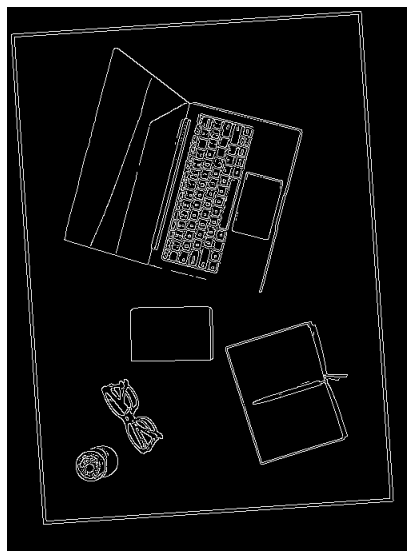

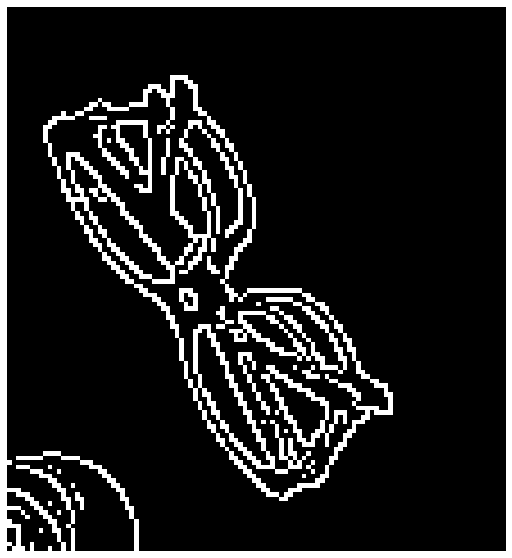

In [6]:
edged = edge(img)

imshow(edged)

#zoom
edged_zoom = edged[450:570, 110:220]
imshow(edged_zoom)

In the lecture, we (will) talk about binary morphological operations as well. Observe how dilation (`dilate`) and erosion (`erode`) transform the image. 

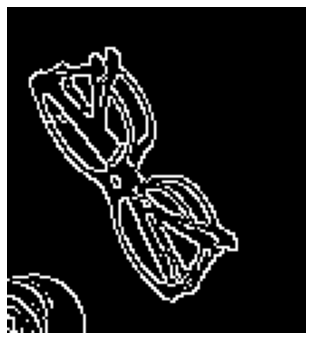

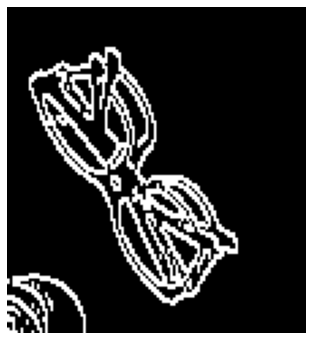

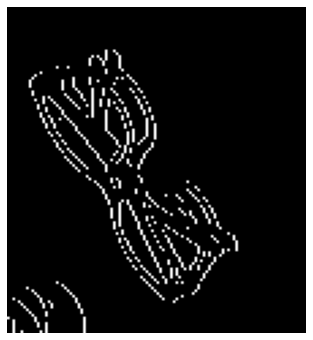

In [7]:
#dilation and erosion
dilate_zoom = dilate(edged_zoom)
erode_zoom = erode(edged_zoom)

#show
imshow(edged_zoom, figsize=[6,6])
imshow(dilate_zoom, figsize=[6,6])
imshow(erode_zoom, figsize=[6,6])

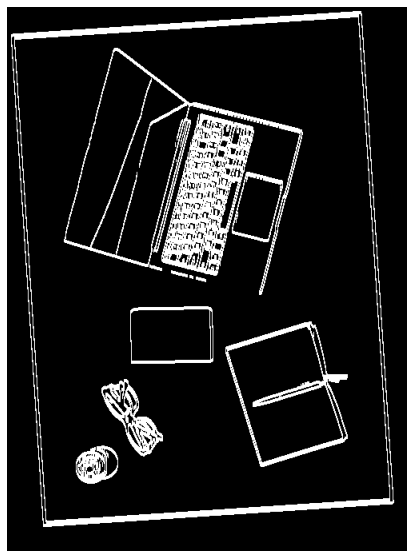

In [8]:
edged = dilate(edged, iterations=3)
imshow(edged)

<a name="advanced"></a>
## Advanced classical computer vision methods: *contour finding and warping*

In order to succesfully do the task, we need two more advanced methods. One for the correcting the potentially rotated rectangular frame, for which we will use **warping**, and one to recognize and detect contours of the shapes of interest, namely **contour finding** methods. Since the set-up is rather clean - no much clutter, 'perfect' 2D, and no other disturbing objects in the image - these methods are suitable and precise enough. 

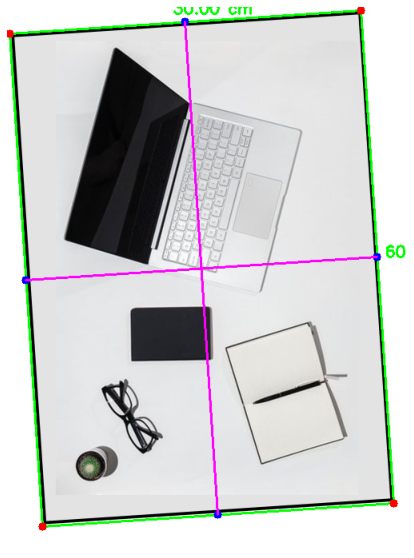

In [9]:
frame = [30, 60]

cnt  = findcnts(edged)
bbox = getbbox(cnt)
drawbbox(img, bbox, dimbbox=frame)

Shape of the image is 375 x 563 x 3 (height x width x dimension)


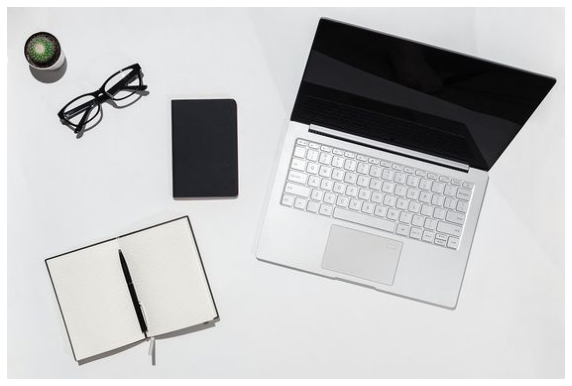

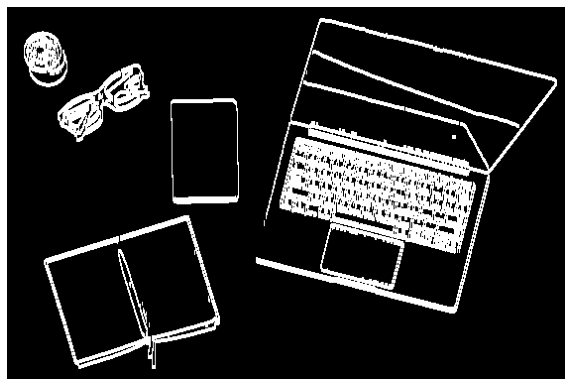

In [10]:
#read image using cv2.imread (note: these might differ from your folder structure and filename)
img2 =  cv2.imread(r"/content/gdrive/My Drive/PhD/Interactive architecture/mintable.jpg")

#shows the image
imshow(img2)

#get shape
getshape(img2)

#edge, erode, dilate
edged2 = edge(img2)
edged2 = dilate(edged2, iterations=3)

#show
imshow(edged2)

Pixels per cm in X and Y = 9.38


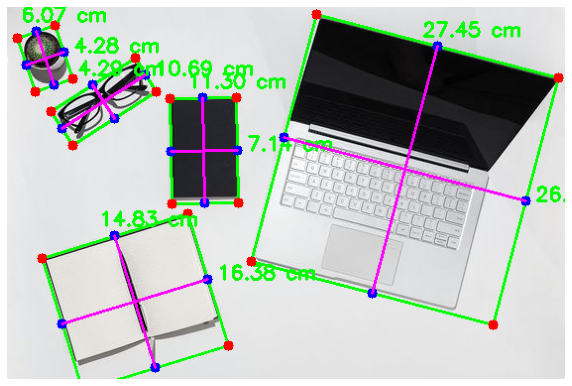

In [11]:
pixpm = pixpermetric(img2, frame[1], show=True)

cnts  = findcnts(edged2)
bboxs = getbbox(cnts)
drawbbox(img2, bboxs, pixpm=pixpm)

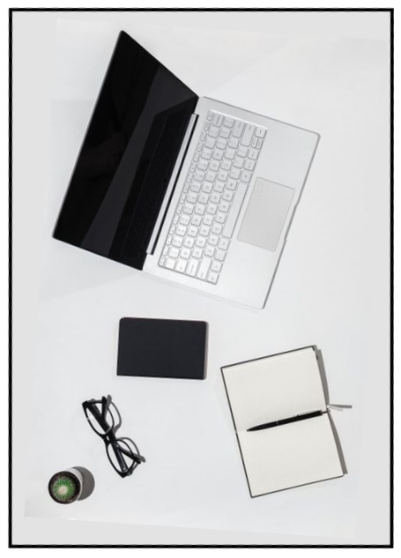

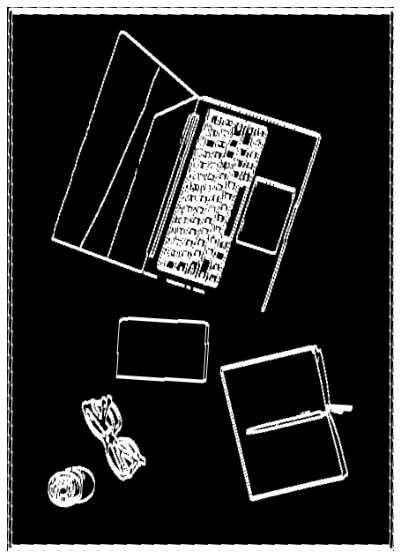

In [12]:
#warp image
img_w = warp(img, cnt[0])
edged_w = warp(edged, cnt[0])

#show
imshow(img_w)
imshow(edged_w)

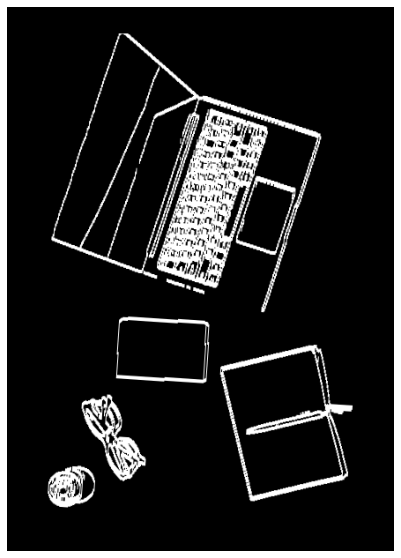

In [13]:
#black borders
edged_w = border2black(edged_w, off=30)

#show
imshow(edged_w)

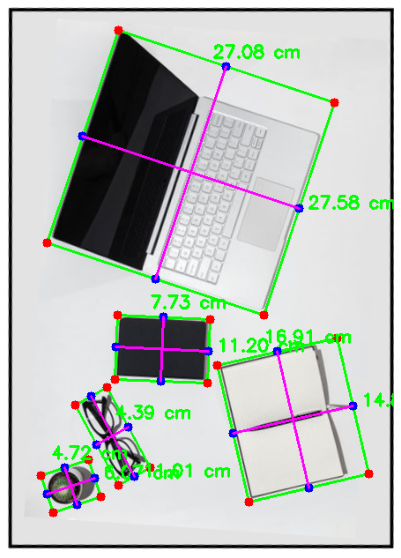

In [14]:
cnts  = findcnts(edged_w)
bboxs = getbbox(cnts)
drawbbox(img_w, bboxs, pixpm=pixpm)

<a name="link"></a>
## Linking the 'functions' to the task: detection, estimation, and localization of the design elements.

As you have seen we can now succesfully warp an image w.r.t. to its rectangular frame, and as well as detect and estimate the sizes of the elements within. It does not solve the task explicitly though, since it provides the collection of design elements and their locations, rather than highlighting the specific design element to be 'picked'. For that, we need to connect *a* user input (the dimensions of the design element to be picked up) to the algorithm. In this example, it could mean to *find* the location (center of mass) and orientation (angle wr.t. frame) of a office element, say the notebook. The following 'search' algorithm only needs the dimensions of the object, in this cas 3.09 x 3.07 cm.

In [15]:
import numpy as np
from scipy.spatial import distance as dist

def findelement(dim, bboxs, pixpm):

    dim = np.array(dim)
    d = []
    
    for bbox in bboxs:

        (tl, tr, br, bl) = bbox
        (tltrX, tltrY) = midpoint(tl, tr)
        (blbrX, blbrY) = midpoint(bl, br)

        # compute the midpoint between the top-left and top-right points, 
        # followed by the midpoint between the top-righ and bottom-right
        (tlblX, tlblY) = midpoint(tl, bl)
        (trbrX, trbrY) = midpoint(tr, br)

        # compute the Euclidean distance between the midpoints
        dimA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
        dimB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
        
        if pixpm is not None:
            # if the pixels per metric has not been initialized, then compute 
            # it as the ratio of pixels to supplied metric (in this case, inches)
            d.append(pix2metric([dimA, dimB], pixpm))

    
    #get difference and find closest point (based on euclidian distance)
    d = np.array(d)
    eucl = np.sqrt(np.sum(np.power(d - dim, 2), axis=1))

    #find using argsort (finds argument)
    idx = np.argsort(eucl)[0]

    return idx

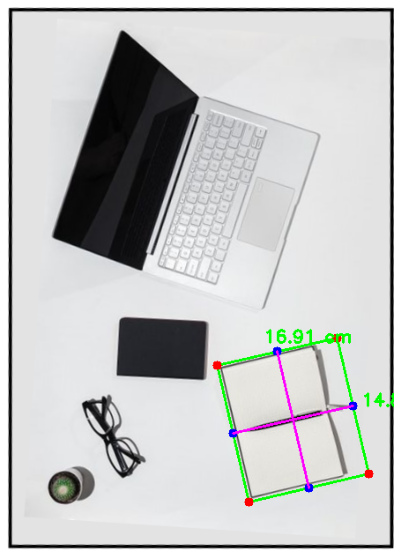

In [16]:
#specify to be found element (based on size dimension)
dim = [16, 14]

#find element + create new 'list' with closest point
idx = findelement([16,14], bboxs, pixpm)
bboxfound = [bboxs[idx]]

#draw specific bounding box
drawbbox(img_w, bboxfound, pixpm=pixpm)

<a name="assignment"></a>
## Create your own script!

By now, you should have the knowledge and know-how to create your own script. 

Good luck.